<H1>Import Libraries</H1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<H1>Get DataSet Through Link</H1>

In [5]:
Data =pd.read_csv("googleplaystore.csv")
Data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


<H1>Data Checking like Columns,,Type,Statistical Details , Missing Values, Fill and Drop Column</H1>

In [7]:
Data.shape

(10840, 13)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [9]:
Data.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [10]:
Data.dtypes

Rating            float64
App                object
Category           object
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
Data.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [12]:
Data=Data.drop_duplicates()
Data=Data.dropna(how='all')

In [13]:
Data.shape

(10357, 13)

In [14]:
Data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [15]:
Rating_row=Data.Rating
Rating_row.isnull().sum()

1465

In [16]:
meanvalue=np.mean(Rating_row)
meanvalue

4.187876743139902

In [17]:
#data = data.dropna(subset=['Rating'])  # Drop rows with missing ratings
Rating_row=Rating_row.fillna(np.mean(Rating_row))
Data['Rating']=Rating_row
Data['Rating'].unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 4.18787674, 4.8       , 4.9       , 3.6       ,
       3.7       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [18]:
Data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.100000,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.900000,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.700000,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.500000,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.300000,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.500000,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.000000,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,4.187877,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,4.500000,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


<h1>Split Sring Data and Remove Useless Data by Empty Space</h1>

In [20]:
# Convert Installs and Price
Data['Installs'] = Data['Installs'].astype(str).str.replace('+', '').str.replace(',', '').astype(int)
Data['Price'] = Data['Price'].astype(str).str.replace('$', '').astype(float)
Data


,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.100000,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.900000,Coloring book moana,ART_AND_DESIGN,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.700000,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.500000,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.300000,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.500000,Sya9a Maroc - FR,FAMILY,38,53M,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.000000,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,4.187877,Parkinson Exercices FR,MEDICAL,3,9.5M,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,4.500000,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [21]:
Data['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10835                   53M
10836                  3.6M
10837                  9.5M
10838    Varies with device
10839                   19M
Name: Size, Length: 10357, dtype: object

<h1>Convert Size M to interger Value</h1>

In [23]:
Data['Size'] = Data['Size'].apply(lambda x: str(x).replace('M', '') if isinstance(x, str) else x)
Data['Size'] = pd.to_numeric(Data['Size'], errors='coerce') * 1000000
Data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.100000,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.900000,Coloring book moana,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.700000,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.500000,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.300000,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.500000,Sya9a Maroc - FR,FAMILY,38,53000000.0,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10836,5.000000,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600000.0,100,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up
10837,4.187877,Parkinson Exercices FR,MEDICAL,3,9500000.0,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
10838,4.500000,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [24]:
def convert_to_kb(size):
    size_str = str(size)

    # Handle non-numeric cases like 'Varies with device'
    if size == 'Varies with device' or pd.isna(size):
        return None  # Or you can return 0 or another value if desired
    
    # If the size contains 'M' for MB
    if 'M' in size_str:
        mb_value = float(size_str.split('M')[0])
        kb_value = mb_value * 1024  # 1 MB = 1024 KB
        return kb_value
    # If the size is already in KB
    elif 'K' in size_str:
        return float(size_str.split('K')[0])
    else:
        return float(size_str)  # If no unit, assume it's already KB

In [25]:
Data['Size'] = Data['Size'].apply(convert_to_kb)
Data['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10835    53000000.0
10836     3600000.0
10837     9500000.0
10838           NaN
10839    19000000.0
Name: Size, Length: 10357, dtype: float64

In [26]:
Data['Size'].fillna(np.mean(Data['Size']))
Data['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10835    53000000.0
10836     3600000.0
10837     9500000.0
10838           NaN
10839    19000000.0
Name: Size, Length: 10357, dtype: float64

In [27]:
# Convert to millions (divide by 10 million)
Data['Size_Million'] = Data['Size'] / 100000

# Display the first 20 rows with 'Size' and 'Size_Million' columns
print(Data[['Size', 'Size_Million']].head(10).to_string())

         Size  Size_Million
0  19000000.0         190.0
1  14000000.0         140.0
2   8700000.0          87.0
3  25000000.0         250.0
4   2800000.0          28.0
5   5600000.0          56.0
6  19000000.0         190.0
7  29000000.0         290.0
8  33000000.0         330.0
9   3100000.0          31.0


In [28]:
Data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Million
0,4.100000,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,190.0
1,3.900000,Coloring book moana,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,140.0
2,4.700000,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,87.0
3,4.500000,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up,250.0
4,4.300000,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.500000,Sya9a Maroc - FR,FAMILY,38,53000000.0,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up,530.0
10836,5.000000,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600000.0,100,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up,36.0
10837,4.187877,Parkinson Exercices FR,MEDICAL,3,9500000.0,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up,95.0
10838,4.500000,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device,NaN


<Axes: xlabel='Size', ylabel='Density'>

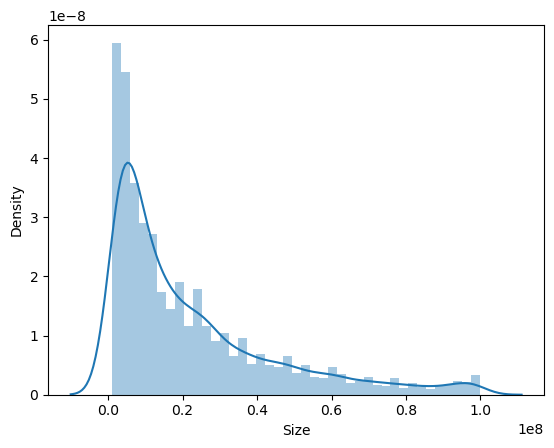

In [29]:
sns.distplot(Data['Size'],kde = True)

<h1>Exploratory Data Analysis (EDA)</h1>

<h3>1. Visualizing Distributions</h3>

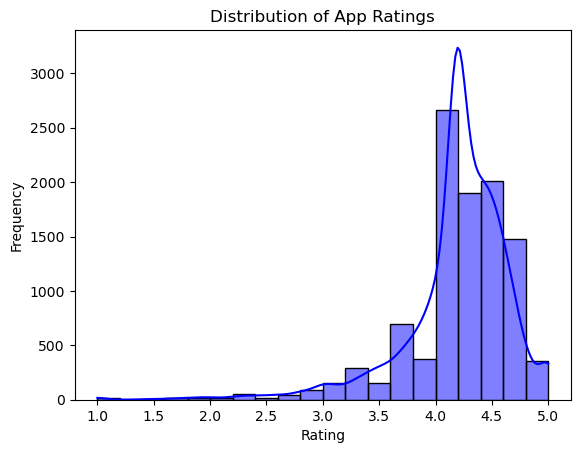

In [32]:
# Distribution of Ratings
sns.histplot(Data['Rating'], kde=True, bins=20, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

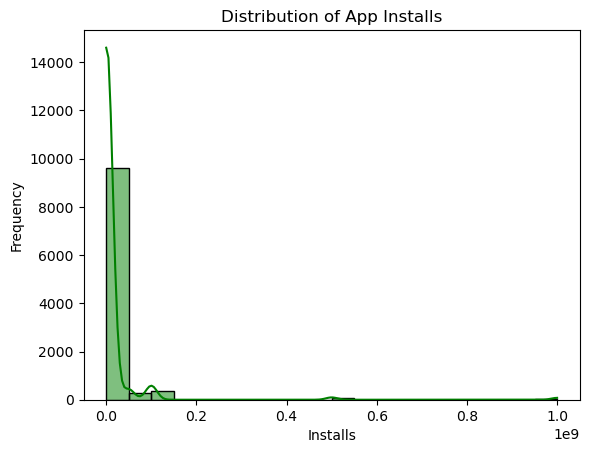

In [33]:
# Distribution of Installs
sns.histplot(Data['Installs'], kde=True, bins=20, color='green')
plt.title('Distribution of App Installs')
plt.xlabel('Installs')
plt.ylabel('Frequency')
plt.show()

<h3>2. Relationship Between Features</h3>

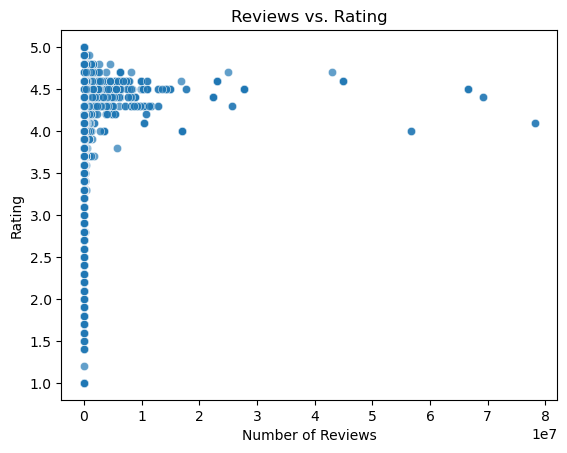

In [35]:
# Scatter plot: Reviews vs. Rating
sns.scatterplot(x=Data['Reviews'], y=Data['Rating'], alpha=0.7)
plt.title('Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

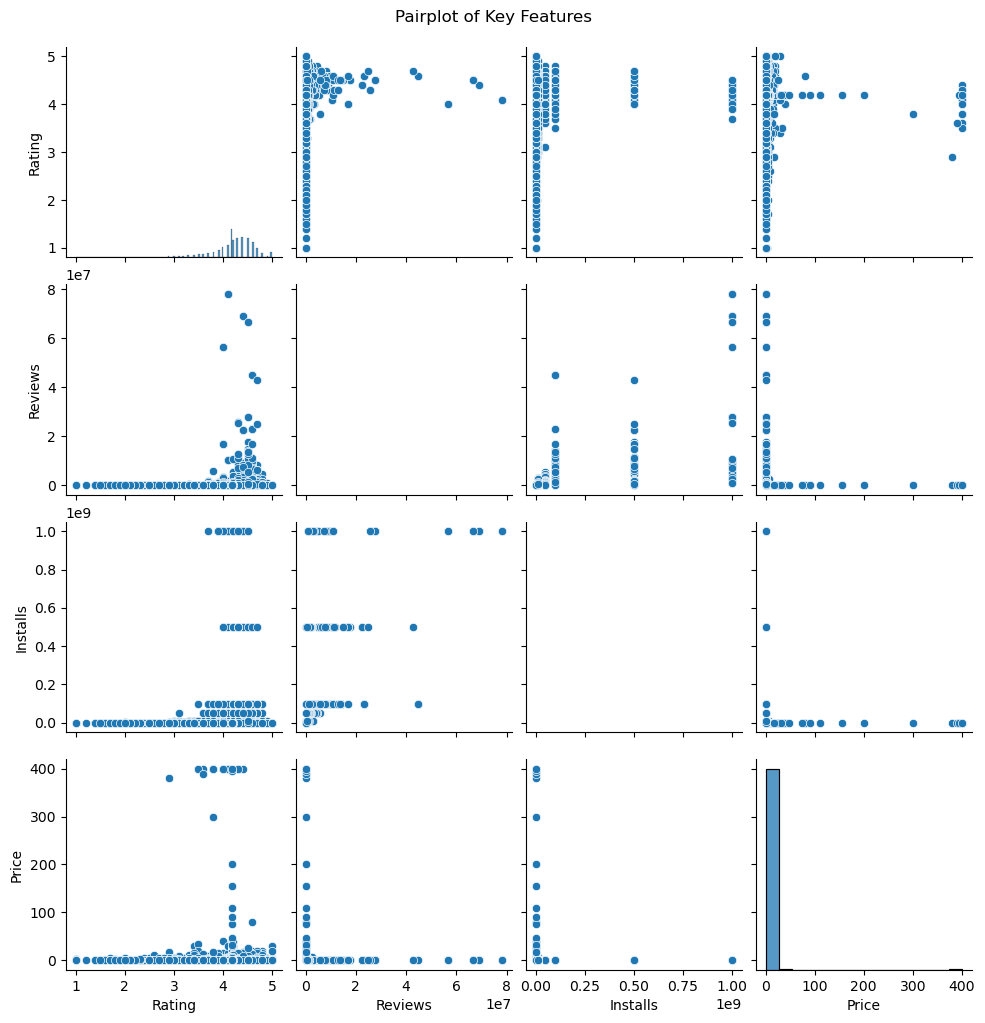

In [36]:
# Pairplot: Multiple relationships
sns.pairplot(Data, vars=['Rating', 'Reviews', 'Installs', 'Price'])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

<h3>3. Category-Based Analysis</h3>

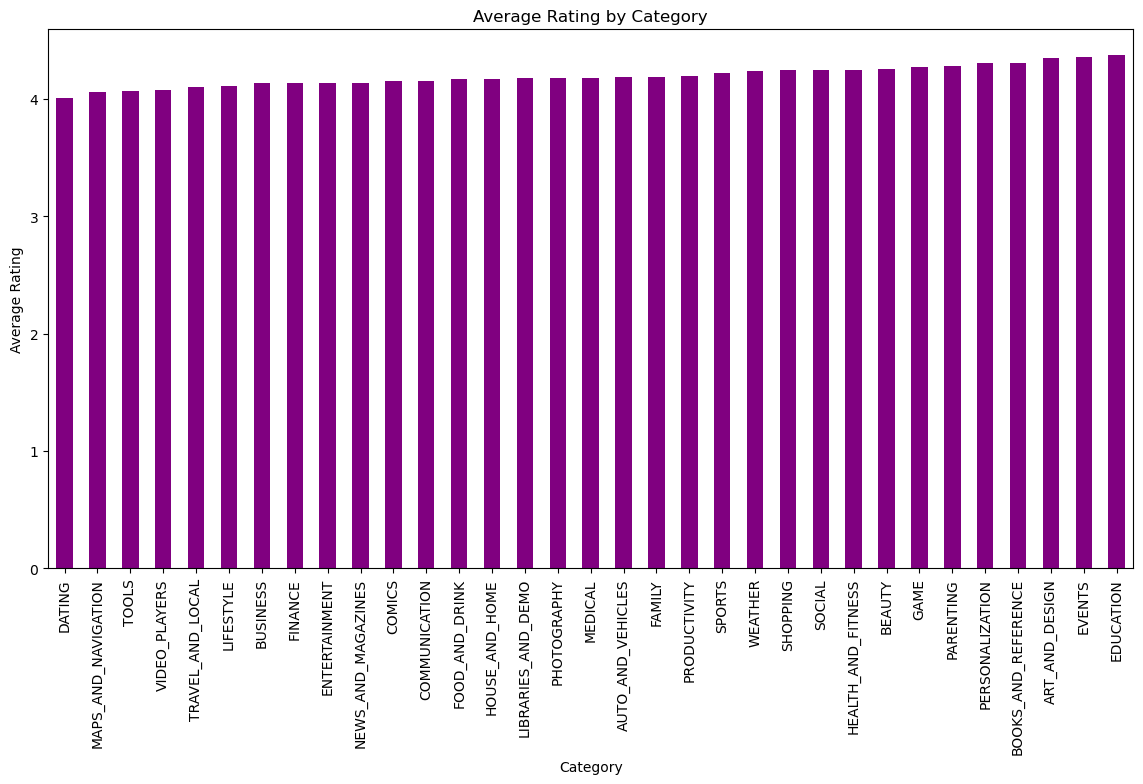

In [38]:
# Average Rating by Category
category_avg_rating = Data.groupby('Category')['Rating'].mean().sort_values()
category_avg_rating.plot(kind='bar', figsize=(14, 7), color='purple')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

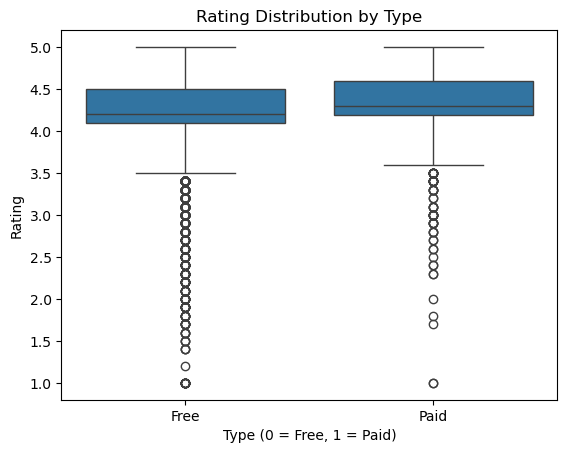

In [39]:
# Box plot: Rating by Type (Free vs Paid)
sns.boxplot(x='Type', y='Rating', data=Data)
plt.title('Rating Distribution by Type')
plt.xlabel('Type (0 = Free, 1 = Paid)')
plt.ylabel('Rating')
plt.show()

<H3>4. Correlation Heatmap</H3>

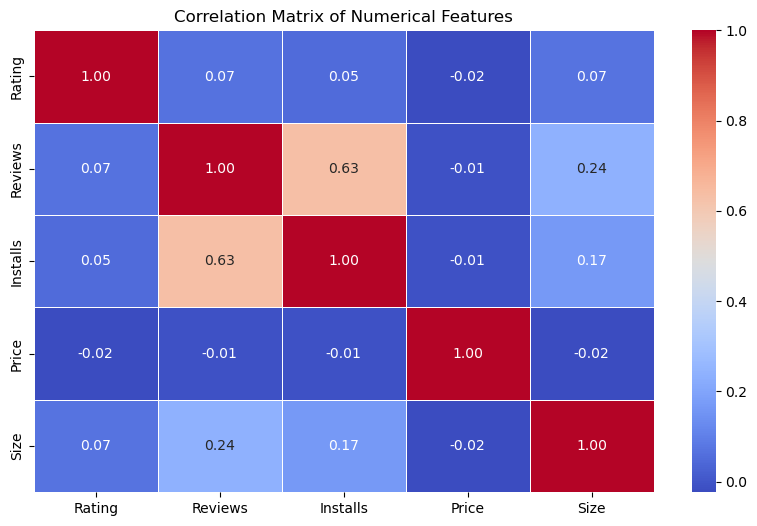

In [41]:
# Correlation heatmap for numerical columns
numerical_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size']
corr_matrix = Data[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<H3>5. Outlier Detection</H3>

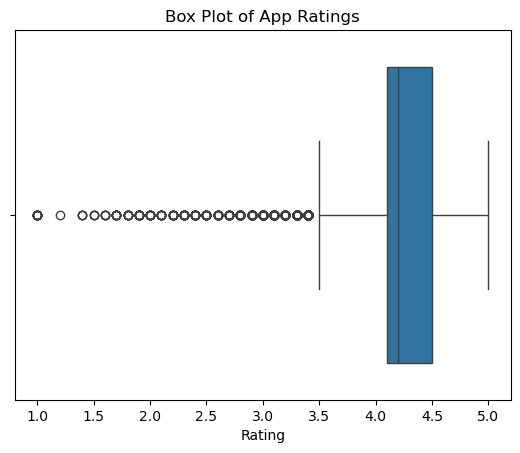

In [43]:
# Box plot for Rating
sns.boxplot(x=Data['Rating'])
plt.title('Box Plot of App Ratings')
plt.xlabel('Rating')
plt.show()

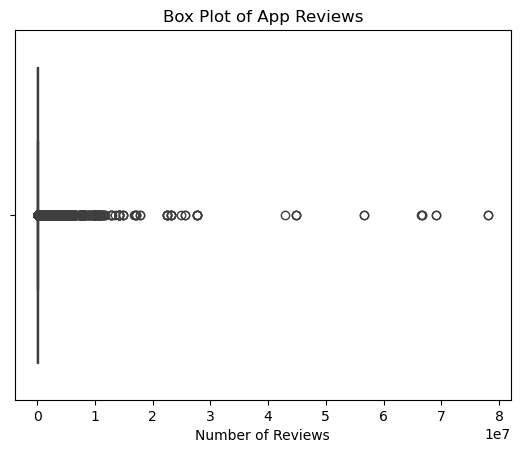

In [44]:
# Box plot for Reviews
sns.boxplot(x=Data['Reviews'])
plt.title('Box Plot of App Reviews')
plt.xlabel('Number of Reviews')
plt.show()

<h1>Train Model and Predictive Analysis</h1>

<H3>1. Import Libraries</H3>

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [48]:
Data

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Million
0,4.100000,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up,190.0
1,3.900000,Coloring book moana,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,140.0
2,4.700000,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up,87.0
3,4.500000,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up,250.0
4,4.300000,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,4.500000,Sya9a Maroc - FR,FAMILY,38,53000000.0,5000,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up,530.0
10836,5.000000,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3600000.0,100,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up,36.0
10837,4.187877,Parkinson Exercices FR,MEDICAL,3,9500000.0,1000,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up,95.0
10838,4.500000,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device,NaN


<h3>2. Data Preparation</h3>

In [50]:
# Select relevant features
features = ['Reviews', 'Size', 'Installs', 'Price', 'Type']  # Include other relevant features as needed
X = Data[features]
y = Data['Rating']

# Standardize numerical features
scaler = StandardScaler()
X[['Reviews', 'Size', 'Installs', 'Price']] = scaler.fit_transform(X[['Reviews', 'Size', 'Installs', 'Price']])

# Apply LabelEncoder to the categorical feature(s), e.g., 'Type'
label_encoder = LabelEncoder()

# Assuming 'Type' is categorical and needs encoding
X['Type'] = label_encoder.fit_transform(X['Type'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h3>3. Train a Random Forest Regressor</h3>

In [52]:
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

<h3>4. Evaluate the Model</h3>

In [54]:
# Calculate R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: -0.02
RMSE: 0.50


<H3>5. Feature Importance</H3>

Reviews: 0.4776
Size: 0.3879
Installs: 0.0986
Price: 0.0291
Type: 0.0069


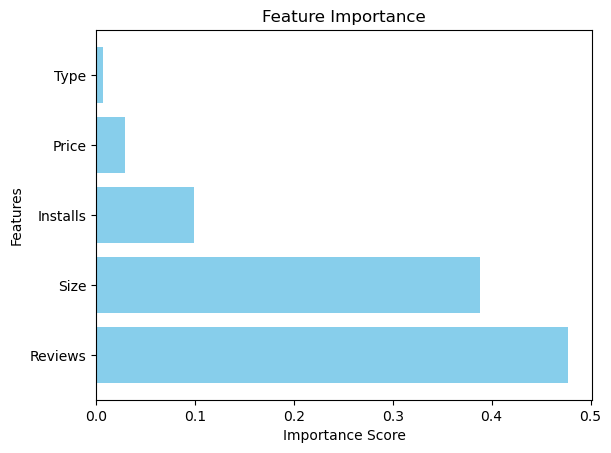

In [56]:
# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")

# Visualize feature importance
plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

<h3>Checking Predictions for Specific Inputs</h3>

In [61]:
# Example feature values
example_inputs = [
    {'Reviews': 1000, 'Size': 25.0, 'Installs': 500000, 'Price': 2.99, 'Type': 1},
    {'Reviews': 2000, 'Size': 30.0, 'Installs': 1000000, 'Price': 0.99, 'Type': 0},
    {'Reviews': 500, 'Size': 20.0, 'Installs': 200000, 'Price': 1.99, 'Type': 1},
]

# Create DataFrame for example inputs
example_df = pd.DataFrame(example_inputs)

# Standardize the inputs
example_df[['Reviews', 'Size', 'Installs', 'Price']] = scaler.transform(
    example_df[['Reviews', 'Size', 'Installs', 'Price']]
)


# Predict Ratings
predictions = model.predict(example_df)

# Display predictions
example_df['Predicted Rating'] = predictions
print(example_df)

    Reviews      Size  Installs     Price  Type  Predicted Rating
0 -0.150151 -0.976641 -0.170221  0.120360     1             3.979
1 -0.149780 -0.976641 -0.163989 -0.002507     0             4.013
2 -0.150337 -0.976641 -0.173960  0.058927     1             4.074


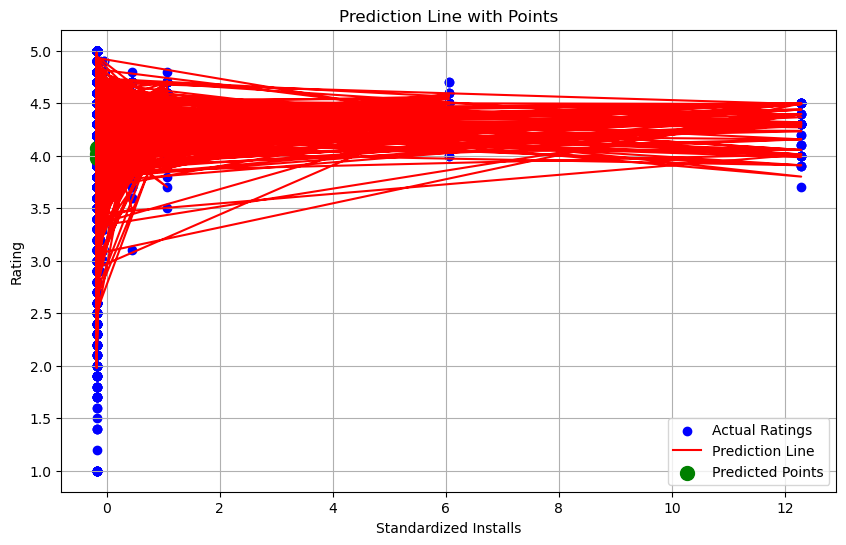

In [63]:
# Assuming you have 'model' as your trained RandomForestRegressor
# Ensure you are using the correct model
y_train_pred = model.predict(X_train)  # Use the trained model for predictions

# Visualize the prediction (simplified to two dimensions: Installs vs Rating)
plt.figure(figsize=(10, 6))

# Use one feature (Installs) for visualization purposes
X_train_installs = X_train.iloc[:, 2]  # Use .iloc for integer-based indexing of DataFrame

# Scatterplot for actual points
plt.scatter(X_train_installs, y_train, color='blue', label='Actual Ratings')

# Line of predictions
plt.plot(X_train_installs, y_train_pred, color='red', label='Prediction Line')

# Assuming 'example_df' contains some example inputs
# Add predictions for example inputs
example_installs = example_df['Installs']
plt.scatter(example_installs, example_df['Predicted Rating'], color='green', label='Predicted Points', s=100)

# Labels and legend
plt.xlabel('Standardized Installs')
plt.ylabel('Rating')
plt.title('Prediction Line with Points')
plt.legend()
plt.grid()
plt.show()

In [65]:
# Prepare the data (drop rows with missing target or features)
data_cleaned = Data.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Type'])

# Select features and target
features = ['Reviews', 'Size', 'Installs', 'Price', 'Type']
X = data_cleaned[features]
y = data_cleaned['Rating']

# One-hot encode categorical variables if necessary
X = pd.get_dummies(X, columns=['Type'], drop_first=True)  # Encode 'Type' (e.g., Free = 0, Paid = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Get coefficients
coefficients = linear_model.coef_
feature_names = features  # Adjust based on your feature list
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

# Intercept
print(f"Intercept: {linear_model.intercept_:.4f}")

Reviews: 0.0337
Size: 0.0275
Installs: 0.0014
Price: -0.0164
Type: 0.0287
Intercept: 4.1831


<H1>All Features Deep Analysis</H1>

<h3>Identify the most popular app categories</h3>

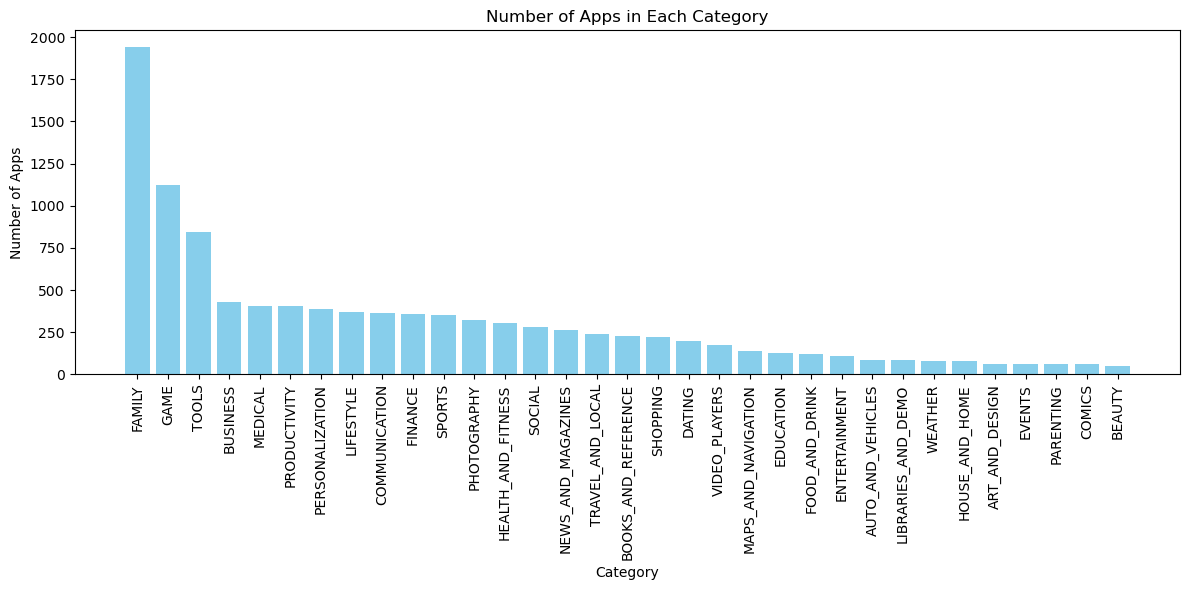

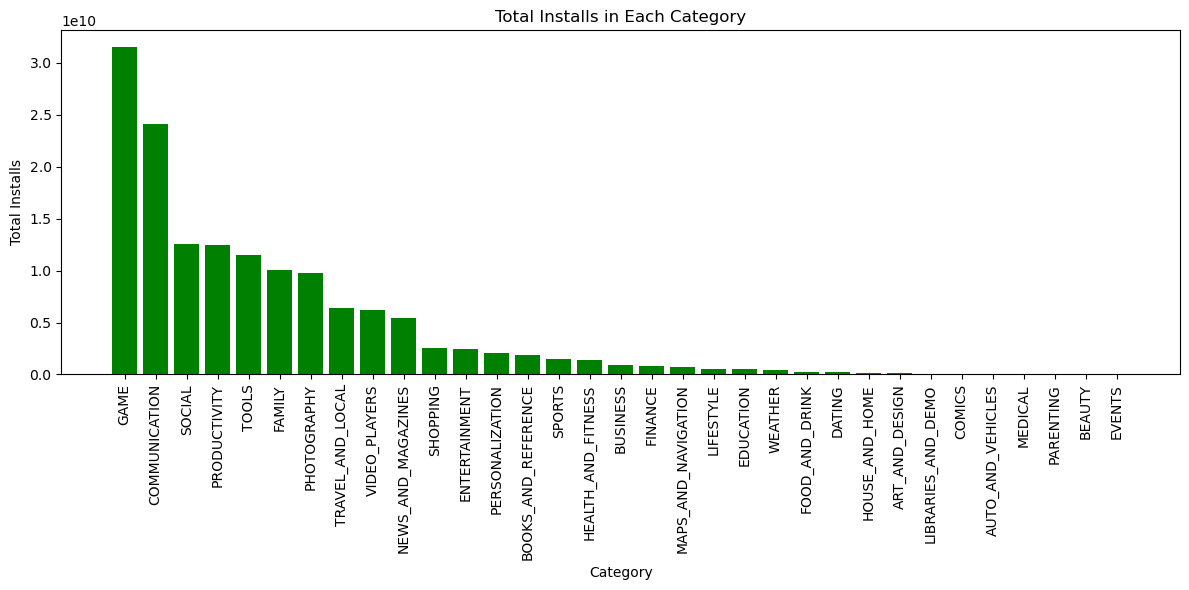

The most popular app category is 'GAME'


In [70]:
# Category Analysis
category_counts = Data['Category'].value_counts()
# Create a bar chart to visualize the distribution of apps across categories
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')
plt.tight_layout()
plt.show()

# Install Analysis
install_counts = Data.groupby('Category')['Installs'].sum().sort_values(ascending=False)
# Create a bar chart to visualize the total installs in each category
plt.figure(figsize=(12, 6))
plt.bar(install_counts.index, install_counts.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Total Installs in Each Category')
plt.tight_layout()
plt.show()

# Identify the most popular category based on total installs
most_popular_category = install_counts.idxmax()
print(f"The most popular app category is '{most_popular_category}'")

<h3>Visualization Diagrams</h3>

In [80]:
## Lets go ahead and explore more data
numeric_features = [feature for feature in Data.columns if Data[feature].dtype != 'O']
categorical_features = [feature for feature in Data.columns if Data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Size_Million']

We have 8 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


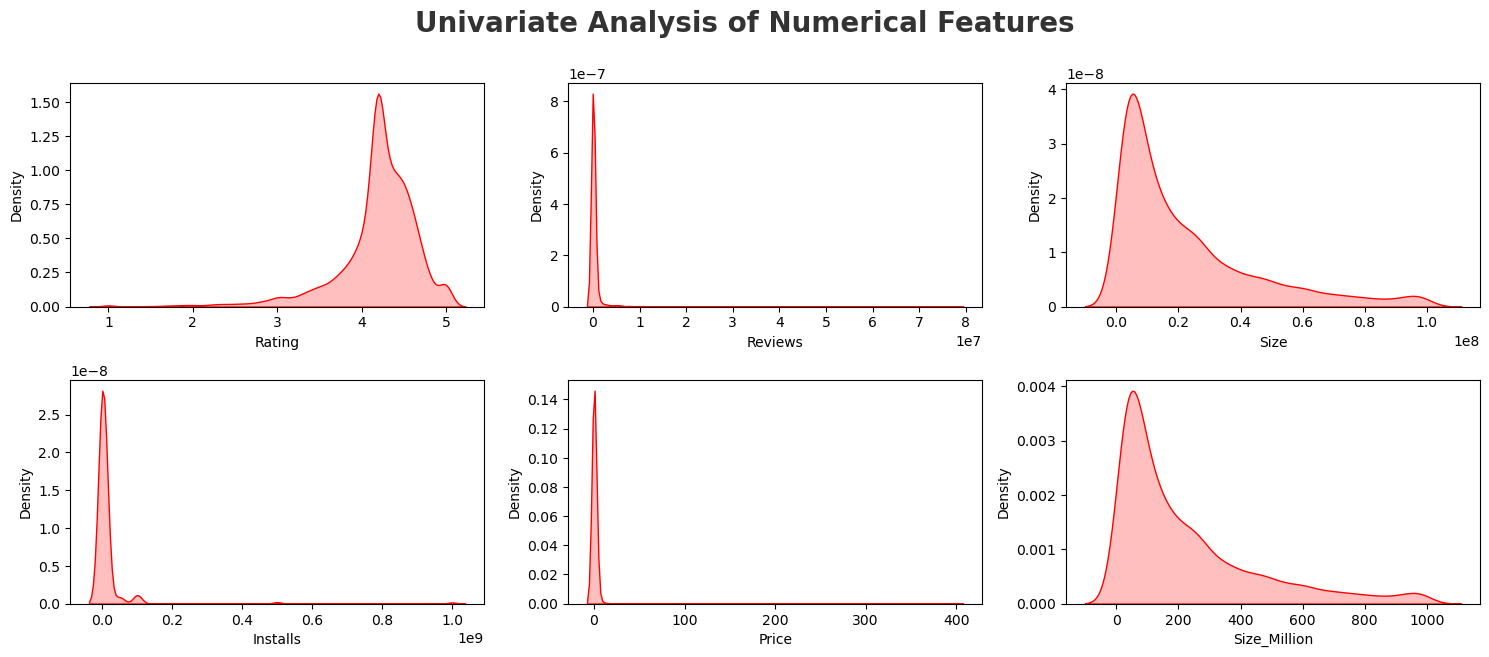

In [84]:
## Visualization Diagrams

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=Data[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<H3>Boxplot to compare rating by Categories</H3>

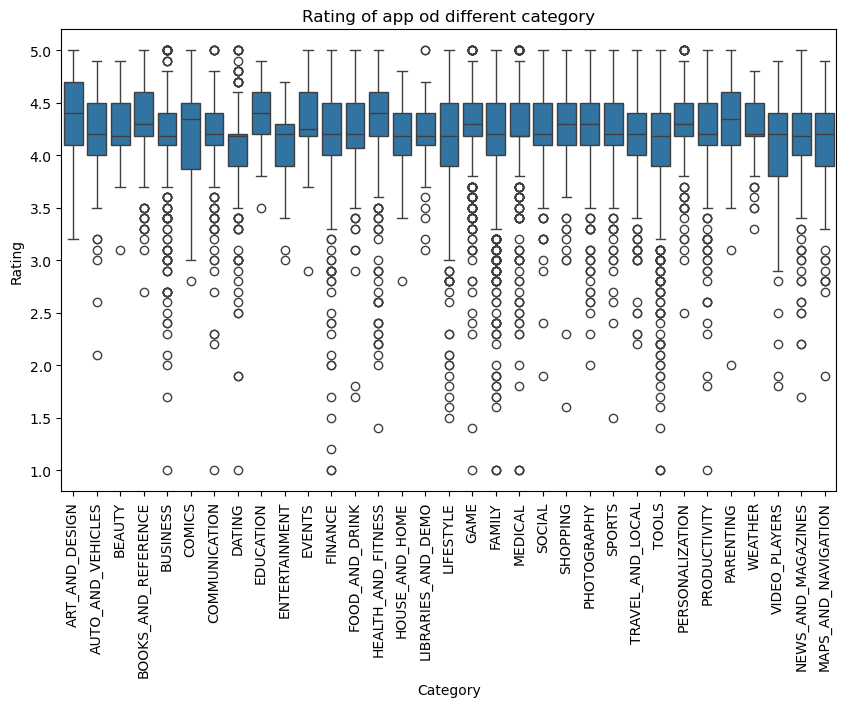

In [88]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Category', y='Rating', data=Data)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.title('Rating of app od different category')
plt.show()

<H3>Pie Chart according to Catagories</H3>

<Axes: ylabel='count'>

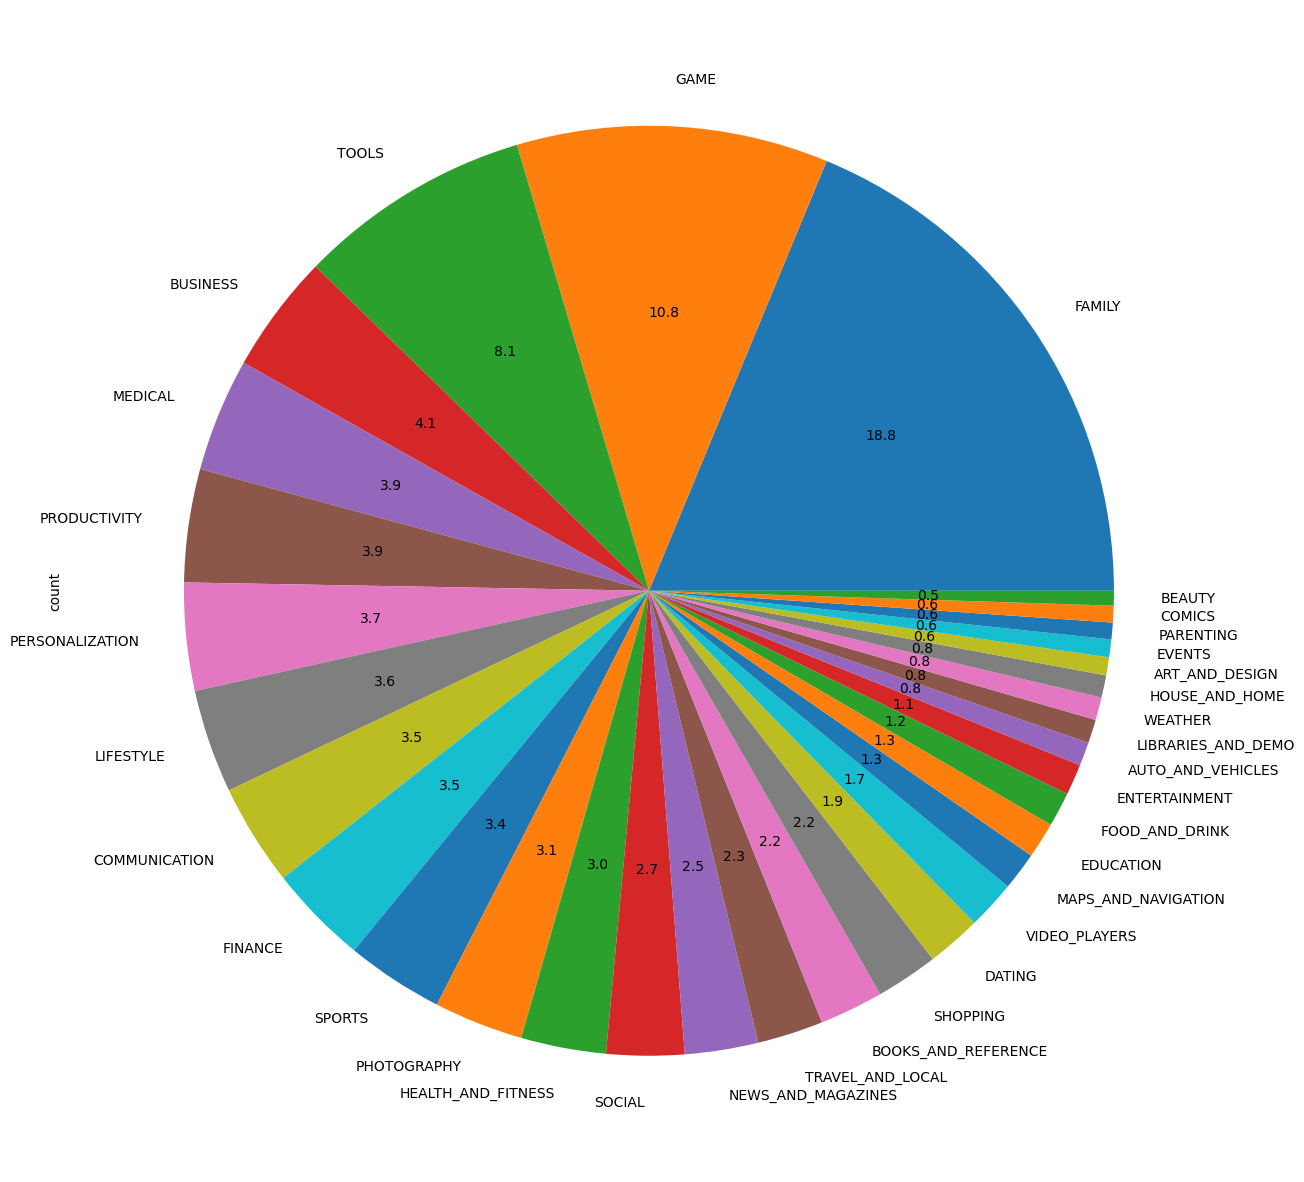

In [96]:
Data['Category'].value_counts().plot.pie(y=Data['Category'],figsize=(15,16),autopct='%1.1f')